# **Stroke Prediction - Predictive Analysis**

Domain yang dipilih untuk dilakukan prediksi adalah domain kesehatan, yang berfokus pada penyakit stroke.

Menurut *World Stroke Organization* (WSO), 13 juta orang terserang stroke setiap tahunnya, dan sekitar 5,5 juta orang akan meninggal dunia. Stroke merupakan penyebab utama kematian dan disabilitas di seluruh dunia, dan itulah sebabnya mengapa dampaknya sangat serius dalam semua aspek kesehatan. Stroke tidak hanya memengaruhi pasien, tetapi juga memengaruhi lingkungan sosial, keluarga, dan tempat kerja pasien. Selain itu, berlawanan dengan kepercayaan masyarakat, stroke dapat terjadi pada siapa saja, pada usia berapa pun, tanpa memandang jenis kelamin atau kondisi fisik.

Stroke didefinisikan sebagai gangguan neurologis akut pada pembuluh darah di otak yang terjadi ketika suplai darah ke suatu area otak terhenti dan sel-sel otak kekurangan oksigen. Stroke dibagi menjadi iskemik dan hemoragik. Stroke iskemik bisa ringan hingga sangat parah dengan kerusakan sementara hingga permanen. Perdarahan jarang terjadi dan melibatkan pecahnya pembuluh darah yang mengakibatkan pendarahan otak. Stroke Iskemik, yang merupakan stroke yang paling umum, melibatkan terhentinya aliran darah ke suatu area otak akibat penyempitan atau penyumbatan arteri.

Referensi:
[1] [Stroke Risk Prediction with Machine Learning Techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9268898/)

## **Business Understanding**

Pada bagian _Business Understanding_ akan dijelaskan mengenai permasalahan yang akan diselesaikan (*problem statements*), tujuan (*goal*), dan solusi yang diajukan (*solution statements*).

### **Problem Statements**
Bagaimana mengetahui pasien memiliki penyakit stroke berdasarkan riwayat dari variabel-variabel kesehatan yang ada?

### **Goals**
Untuk menyelesaikan permasalahan yang telah disampaikan pada bagian *Problem Statement*, maka dibuat model yang digunakan untuk memprediksi apakah seseorang memiliki penyakit stroke berdasarkan riwayat kesehatannya.

### **Solution statements**
Solusi pembuatan model yang dilakukan adalah dengan menerapkan 3 algoritma machine learning, terbatas pada **_K-NN_**, **_Random Forest_**, dan **_AdaBoost_**. Diterapkannya 3 algoritma tersebut bertujuan untuk mengkomparasi dan mendapatkan model atau algoritma yang memiliki tingkat _error_ yang paling kecil, sehingga prediksi penyakit jantung memiliki akurasi yang tinggi.

- **_K-NN_**
Algoritma _K-Nearest Neighbor_ (K-NN) adalah algoritma _machine learning_ yang sederhana dan mudah diterapkan, yang mana umumnya digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam _supervised learning_. Tujuan dari algortima K-NN adalah untuk mengidentifikasi _nearest neighbor_ dari titik yang diberikan, sehingga dapat menetapkan label prediksi ke titik tersebut.

- **_Random Forest_**
_Random forest_ adalah kombinasi dari masing – masing _tree_ atau pohon, yang kemudian dikombinasikan ke dalam satu model. _Random Forest_ bergantung pada sebuah nilai vector acak dengan distribusi yang sama pada semua pohon yang masing masing _tree_ memiliki kedalaman yang maksimal.

- **_AdaBoost_**
_AdaBoost_ atau _Adaptive Boost_ merupakan algoritma yang memanfaatkan _bagging_ dan _boosting_ untuk meningkatkan akurasi. Sama seperti algoritma _random forest_, algoritma _AdaBoost_ juga menggunakan beberapa _decision tree_ untuk melakukan prediksi.

In [1]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## **Data Understanding**

Dataset yang digunakan pada proyek machine learning ini merupakan **5110 data observasi** yang didapat dari situs kaggle [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Terdapat 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit stroke.

**Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

[2]: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahrul59","key":"a2a0b57736f84e06bf56dc1d47197e48"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
100% 67.4k/67.4k [00:00<00:00, 651kB/s]
100% 67.4k/67.4k [00:00<00:00, 648kB/s]


In [5]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [6]:
# load the dataset
stroke_prediction = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke_prediction

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Exploratory Data Analysis**

In [7]:
# mendapatkan informasi dari dataset
stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dari informasi yang didapatkan, disimpulkan terdapat 11 fitur pada data _heart disease_, yang mana memiliki 8 fitur _categorical_ dan 3 fitur _numerical_.

_Categorical_ fitur di antaranya adalah `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence-type`, `smoking_status`, dan `stroke`.

_Numerical_ fitur di antaranya adalah `age`, `avg_glucose_level`, dan `bmi`.

In [8]:
stroke_prediction.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


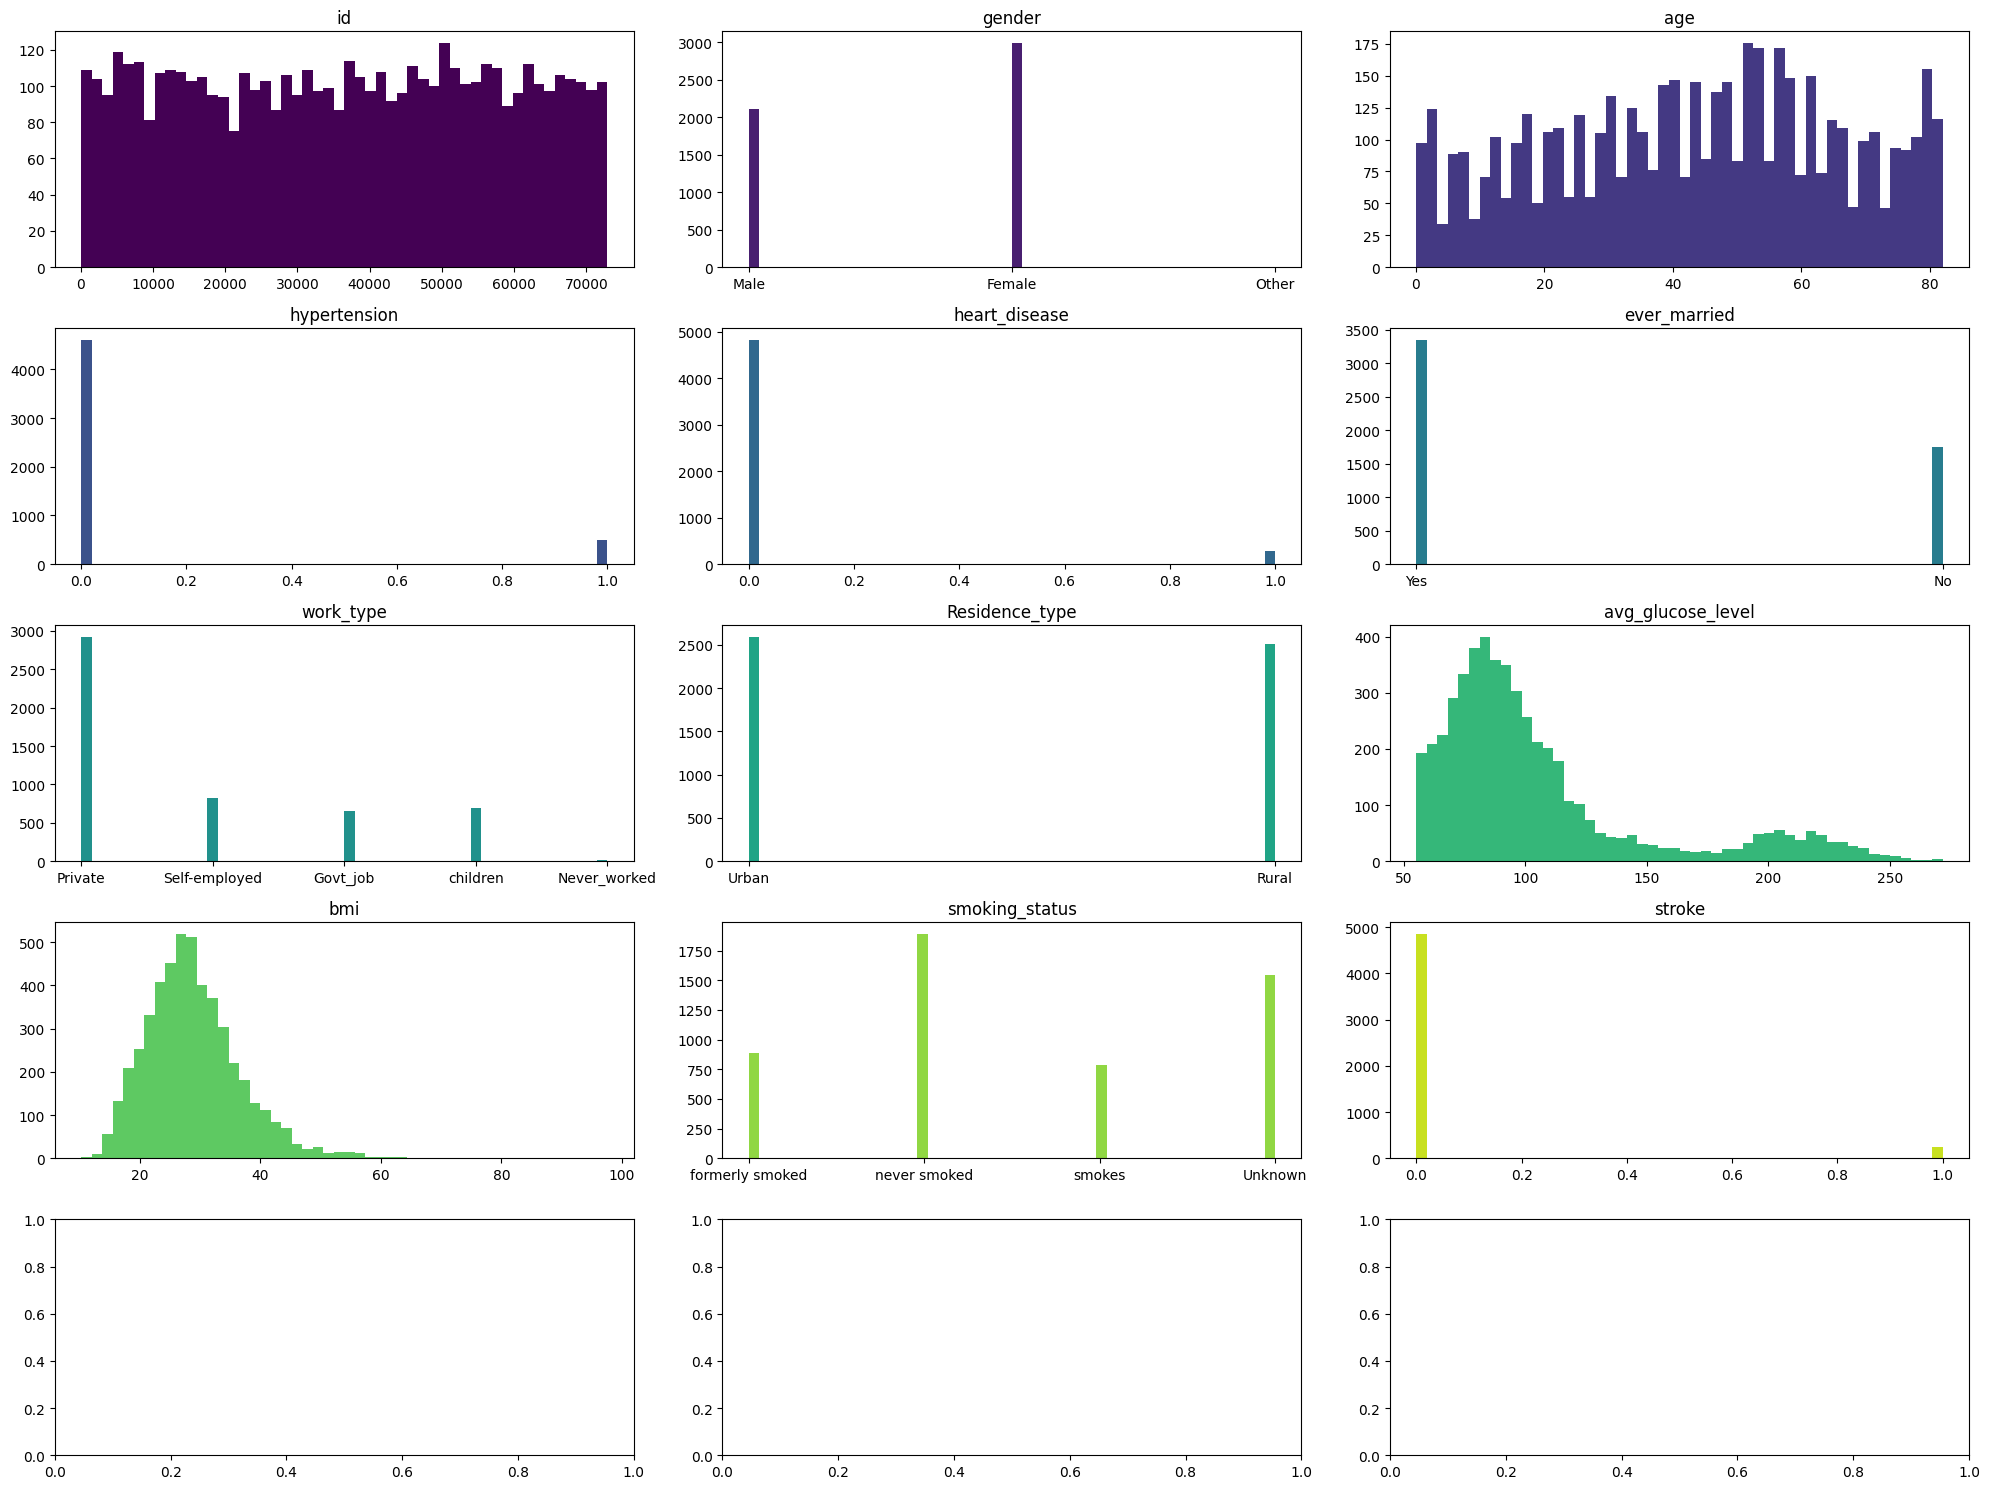

In [9]:
# Define the number of bins
bins = 50

# Define the colormap
cmap = plt.cm.viridis

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, column in enumerate(stroke_prediction.columns):
    # Plot histogram
    axes[i].hist(stroke_prediction[column], bins=bins, color=cmap(i / len(stroke_prediction.columns)))
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

### **Univariate Analysis**

In [10]:
stroke_prediction.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

print(draw_missing_data_table(stroke_prediction))

                   Total   Percent
bmi                  201  0.039335
id                     0  0.000000
gender                 0  0.000000
age                    0  0.000000
hypertension           0  0.000000
heart_disease          0  0.000000
ever_married           0  0.000000
work_type              0  0.000000
Residence_type         0  0.000000
avg_glucose_level      0  0.000000
smoking_status         0  0.000000
stroke                 0  0.000000


In [12]:
data=stroke_prediction.fillna(np.mean(stroke_prediction['bmi']))

Terdapat **201 data missing** di bmi dan setelah itu memasukkan data missing tersebut dengan **mean**.

In [13]:
stroke_prediction.shape

(5110, 12)

<ipython-input-14-2ab5553c58f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stroke_prediction['bmi'], palette='viridis')


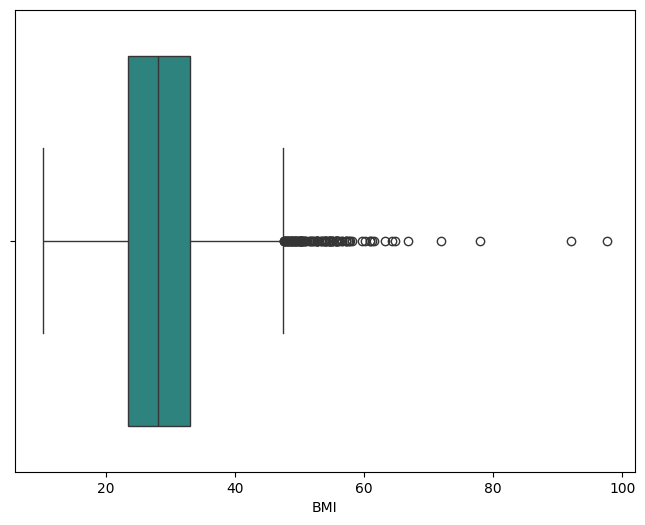

In [14]:
# Boxplot of BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x=stroke_prediction['bmi'], palette='viridis')
plt.xlabel('BMI')
plt.show()

<ipython-input-15-bf258ad7fc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stroke_prediction['avg_glucose_level'], palette='viridis')


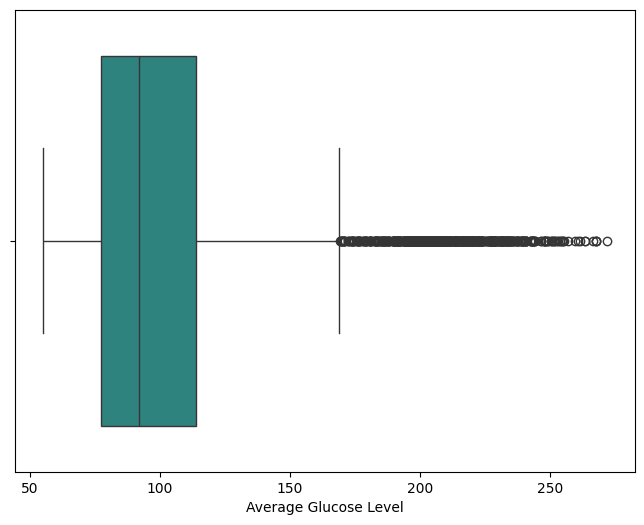

In [15]:
# Boxplot of avg_glucose_level
plt.figure(figsize=(8, 6))
sns.boxplot(x=stroke_prediction['avg_glucose_level'], palette='viridis')
plt.xlabel('Average Glucose Level')
plt.show()

IQR bertujuan untuk mengapuskan outlier yang ada. Hasil akhir data dari outlier yang telah dihapuskan dapat dilihat dengan `shape`.

In [16]:
numeric_columns = stroke_prediction.select_dtypes(include=[np.number]).columns

Q1 = stroke_prediction[numeric_columns].quantile(0.25)
Q3 = stroke_prediction[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

stroke_prediction = stroke_prediction[~((stroke_prediction[numeric_columns] < (Q1 - 1.5 * IQR)) |
                      (stroke_prediction[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(stroke_prediction.shape)

(3824, 12)


Membagi dataset menjadi 2 fitur, yaitu Categorical dan Numerical

In [17]:
# Classifying data into numerical and categorical variables.
data_numerical = ['age','avg_glucose_level','bmi']
data_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']

#### **Categorical Features**

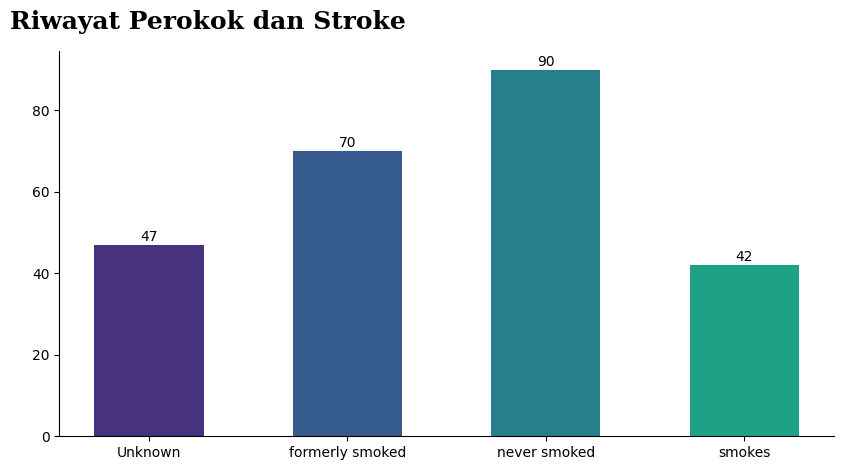

In [18]:
# Smoking Type and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['smoking_status'],values='stroke',aggfunc='count').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pd_stroke['smoking_status'], pd_stroke['stroke'], width=0.55, linewidth=0.7, color=sns.color_palette('viridis'))
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')
ax.grid(False)
for i in ['top', 'right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7, 100, 'Riwayat Perokok dan Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

- Individu dengan status merokok yang tidak diketahui (Unknown) memiliki 47 kejadian stroke.

- Individu yang pernah merokok (Formerly Smoked) memiliki jumlah kejadian stroke kedua tertinggi dengan 70 kejadian.

- Individu yang tidak pernah merokok (Never Smoked) memiliki jumlah kejadian stroke tertinggi dengan 90 kejadian.

- Individu yang masih merokok (Smokes) memiliki jumlah kejadian stroke terendah dengan 42 kejadian.

Plot diatas memberikan gambaran bahwa status merokok seseorang dapat berhubungan dengan kejadian stroke, namun jumlah kejadian stroke tertinggi justru ditemukan pada individu yang tidak pernah merokok. Hal ini mungkin disebabkan oleh faktor lain yang tidak terlihat dalam data, atau bisa juga menunjukkan bahwa ada variabel perancu (confounding variables) yang mempengaruhi hubungan antara merokok dan stroke.

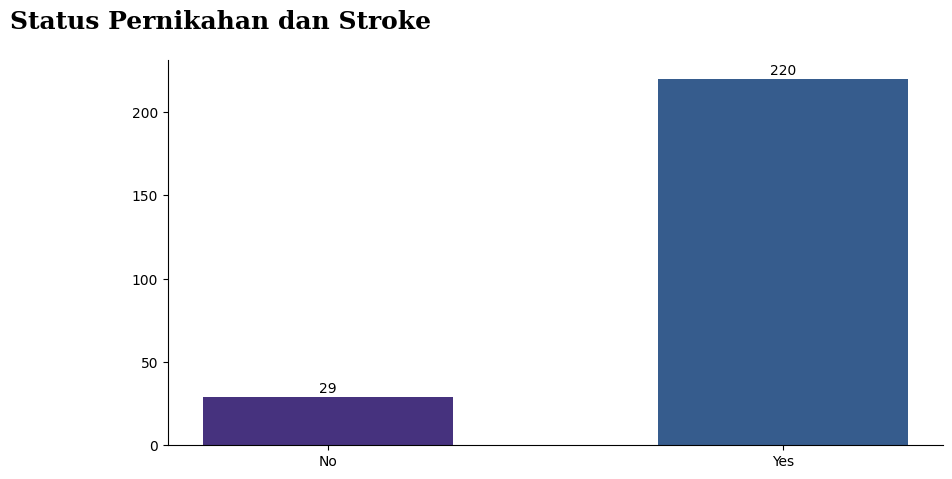

In [19]:
# Marrital Status and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['ever_married'],values='stroke',aggfunc='count').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pd_stroke['ever_married'], pd_stroke['stroke'], width=0.55, linewidth=0.7, color=sns.color_palette('viridis'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an], xy=(pd_stroke['ever_married'][an], pd_stroke['stroke'][an]+5), va='center', ha='center')
ax.grid(False)
for i in ['top', 'right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7, 250, 'Status Pernikahan dan Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

Plot diatas memberikan gambaran bahwa status status perkawinan seseorang dapat berhubungan dengan kejadian stroke, yang dimana seseorang yang sudah menikah cenderung memiliki penyakit stroke dibanding yang belum menikah.

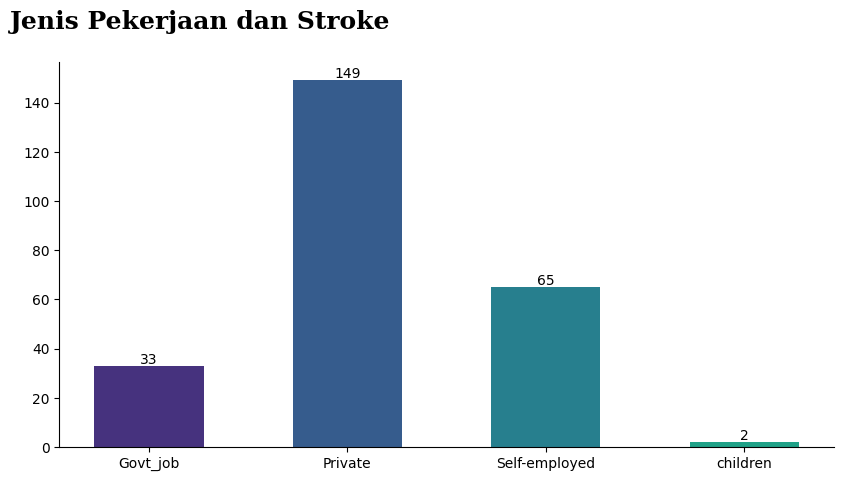

In [20]:
# Work Type and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['work_type'],values='stroke',aggfunc='count').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(pd_stroke['work_type'], pd_stroke['stroke'], width=0.55, linewidth=0.7, color=sns.color_palette('viridis'))
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')
ax.grid(False)
for i in ['top', 'right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7, 170, 'Jenis Pekerjaan dan Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

- Individu yang bekerja di sektor swasta (Private) memiliki jumlah kejadian stroke tertinggi dengan 149 kejadian.

- Individu yang bekerja sendiri (Self Employed) memiliki jumlah kejadian stroke kedua tertinggi dengan 65 kejadian.

- Individu yang bekerja di sektor pemerintah (Govt Job) memiliki 33 kejadian stroke.

- Anak-anak (Children) memiliki jumlah kejadian stroke terendah dengan 2 kejadian.

Plot diatas memberikan gambaran bahwa jenis pekerjaan seseorang dapat berhubungan dengan kejadian stroke. Jumlah kejadian stroke tertinggi ditemukan pada **individu yang bekerja di sektor swasta**, diikuti oleh mereka yang bekerja sendiri, dan kemudian mereka yang bekerja di sektor pemerintah. Jumlah kejadian stroke pada anak-anak sangat rendah, yang bisa diharapkan mengingat prevalensi stroke pada usia muda umumnya lebih rendah dibandingkan dengan orang dewasa.

<ipython-input-21-341ed8fff3f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=pd_stroke['hypertension'], y=pd_stroke['stroke'], palette='viridis')


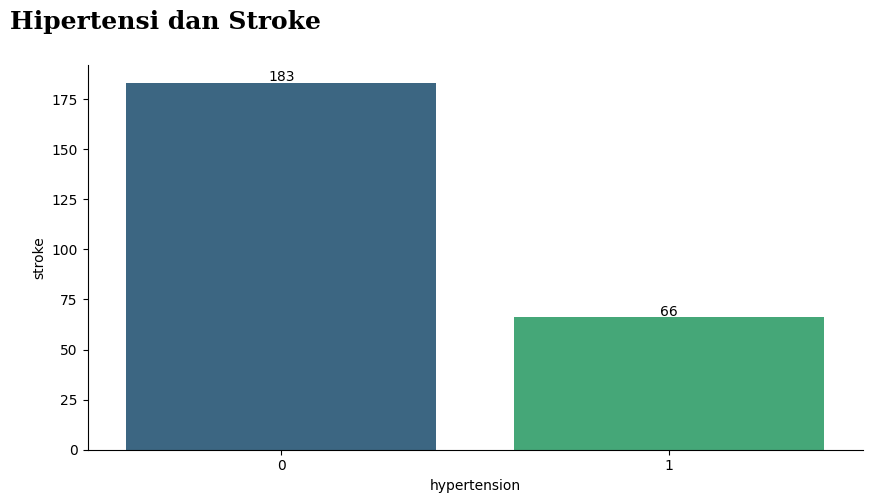

In [21]:
# Hypertension and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['hypertension'],values='stroke',aggfunc='count').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(ax=ax, x=pd_stroke['hypertension'], y=pd_stroke['stroke'], palette='viridis')
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')
ax.grid(False)
for i in ['top', 'right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7, 210, 'Hipertensi dan Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

- Individu tanpa hipertensi (0) memiliki jumlah kejadian stroke yang lebih tinggi, yaitu 183 kejadian.

- Individu dengan hipertensi (1) memiliki jumlah kejadian stroke yang lebih rendah, yaitu 66 kejadian.

Plot ini memberikan gambaran bahwa meskipun hipertensi dikenal sebagai faktor risiko utama untuk stroke, jumlah kejadian stroke lebih banyak ditemukan pada individu yang tidak memiliki hipertensi.

<ipython-input-22-fbd018fa9420>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=pd_stroke['heart_disease'], y=pd_stroke['stroke'], palette='viridis')


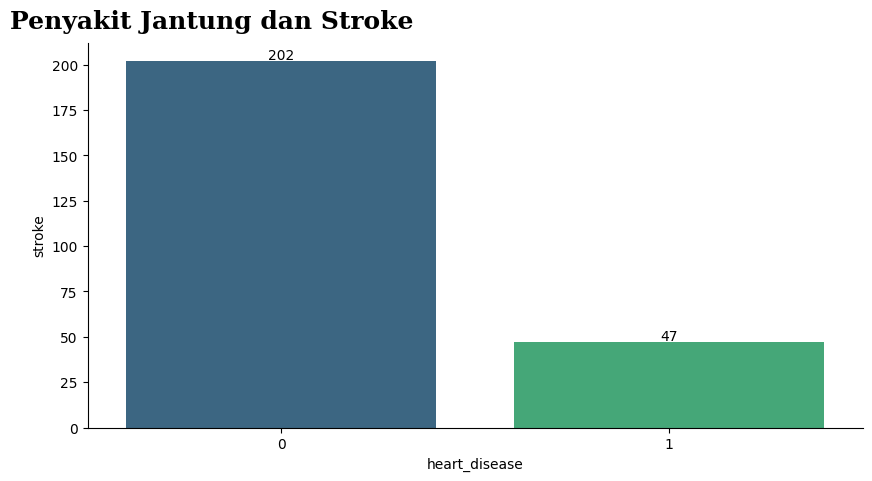

In [22]:
# Heart Disease and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['heart_disease'],values='stroke',aggfunc='count').reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(ax=ax, x=pd_stroke['heart_disease'], y=pd_stroke['stroke'], palette='viridis')
for idx, val in enumerate(pd_stroke['stroke']):
    ax.text(idx, val+1, round(val, 1), horizontalalignment='center')
ax.grid(False)
for i in ['top', 'right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7, 220, 'Penyakit Jantung dan Stroke', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

- Individu tanpa penyakit jantung (0) memiliki jumlah kejadian stroke yang lebih tinggi, yaitu 202 kejadian.

- Individu dengan penyakit jantung (1) memiliki jumlah kejadian stroke yang lebih rendah, yaitu 47 kejadian.

Plot diatas menunjukkan bahwa lebih banyak kejadian stroke ditemukan pada individu yang tidak memiliki penyakit jantung dibandingkan dengan mereka yang memiliki penyakit jantung. Meskipun penyakit jantung adalah faktor risiko untuk stroke.

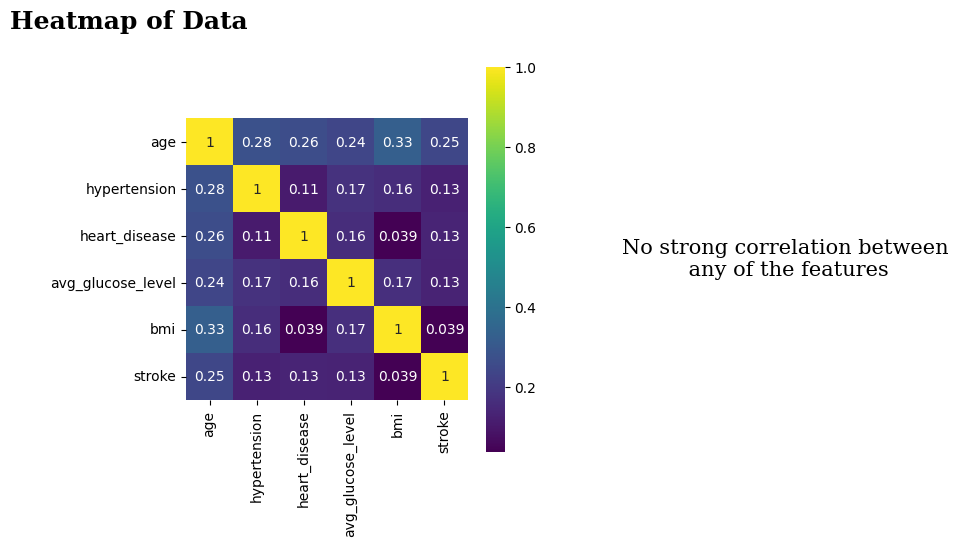

In [23]:
# Drop non-numeric columns and 'id' column
numerical_data = data.select_dtypes(include=[np.number]).drop(columns=['id'])

# Create the figure
fig = plt.figure(figsize=(10, 5), dpi=100)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

# Heatmap of numerical data
corrmat = numerical_data.corr()
sns.heatmap(ax=ax0, data=corrmat, annot=True, cmap="viridis", square=True)
ax1.text(0.5, 0.5, 'No strong correlation between\n any of the features', horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top", "right", "bottom", "left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7, 1.1, 'Heatmap of Data', fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()


**Hasil Pengamatan**:

Pengamatan:

1) Tidak ada korelasi yang kuat antar fitur.

2) Korelasi tertinggi dapat diamati antara indeks massa tubuh (BMI) dan usia.

3) Korelasi terendah dapat diamati antara heart_disease dan hyper_tension (patut dipertanyakan).

##### **Analysis of Categorical Variables**

<ipython-input-24-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-24-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-24-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-24-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

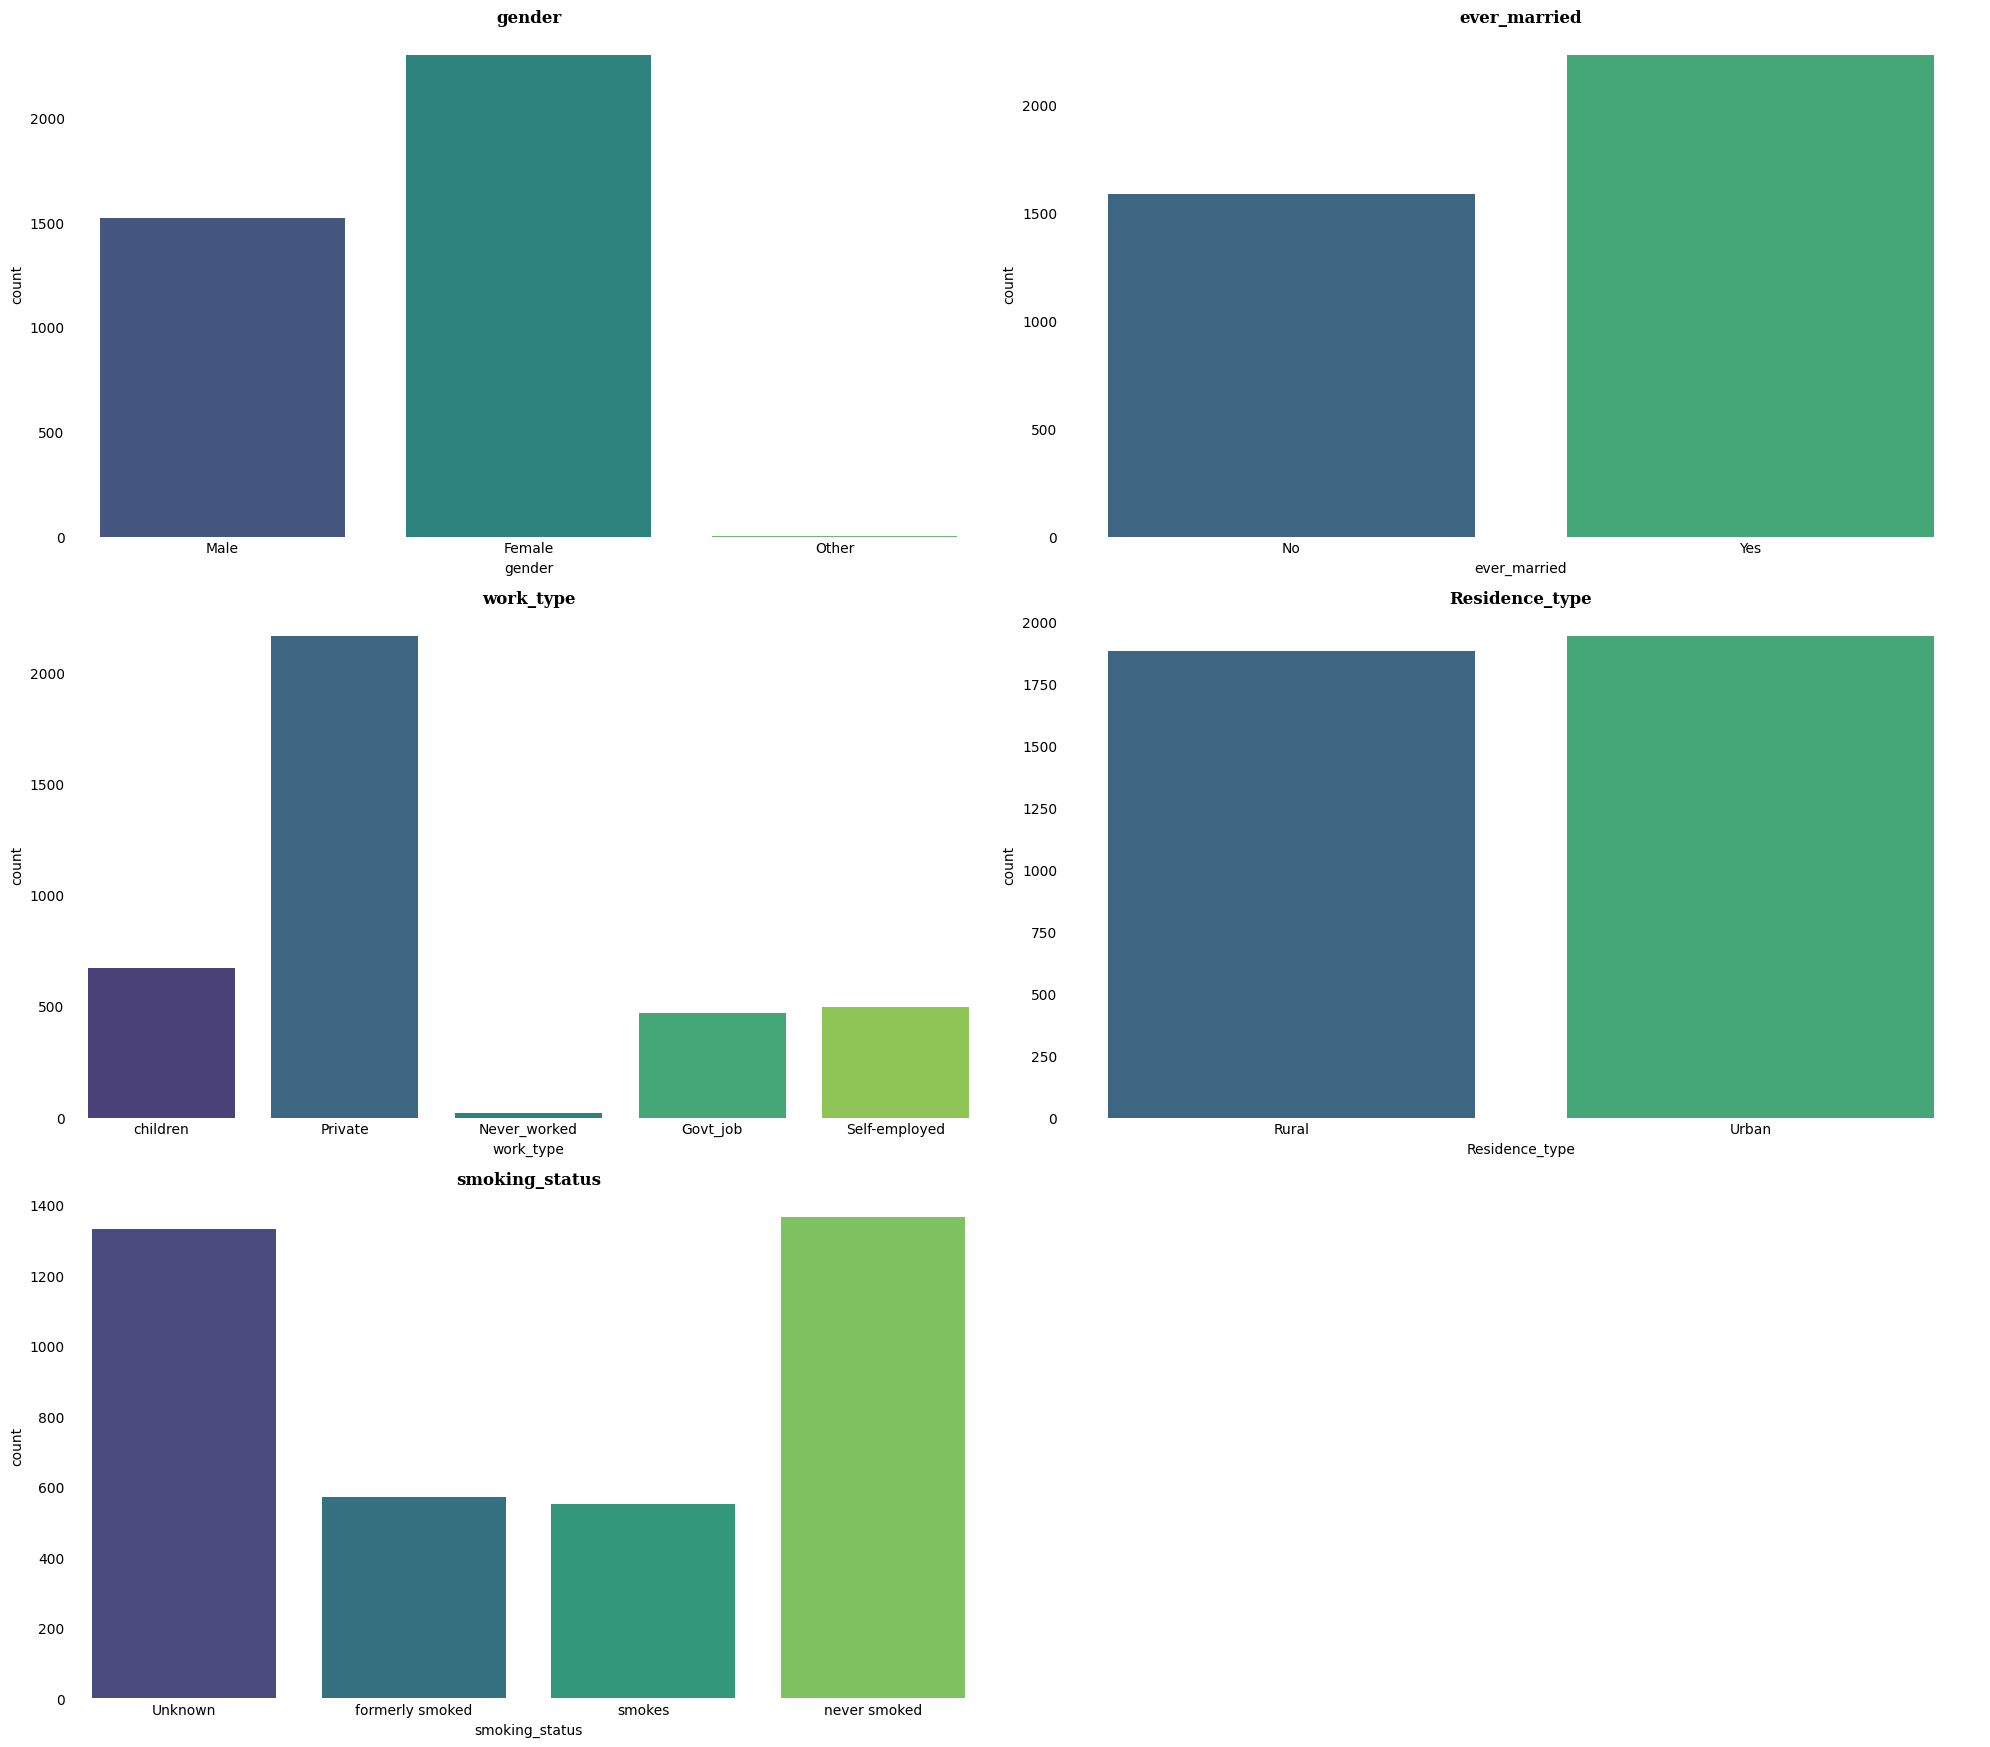

In [24]:
# Select categorical columns (for demonstration purposes)
data_categorical = stroke_prediction.select_dtypes(include=['object', 'category'])

# Create the figure
fig = plt.figure(figsize=(20, 23))

# Plot the count plots for each categorical column
for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 2, indx + 1)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)

# Display the plot
plt.tight_layout()
plt.show()

Hasil Pengamatan:

1) Jumlah perempuan lebih banyak daripada laki-laki dalam penyakit stroke.

2) Jumlah orang yang sudah menikah jauh lebih banyak menderika penyakit stroke daripada yang belum menikah (masuk akal karena distribusinya antara 0 dan 60)

3) Jumlah yang bekerja di perusahaan swasta memiliki penyakit stroke terbanyak.

4) Tidak ada perbedaan antara populasi di daerah perkotaan dan pedesaan.

5) Jumlah orang yang tidak merokok memiliki penyakit stroke terbanyak.

##### **Analysing Categorical Variables with Stroke**

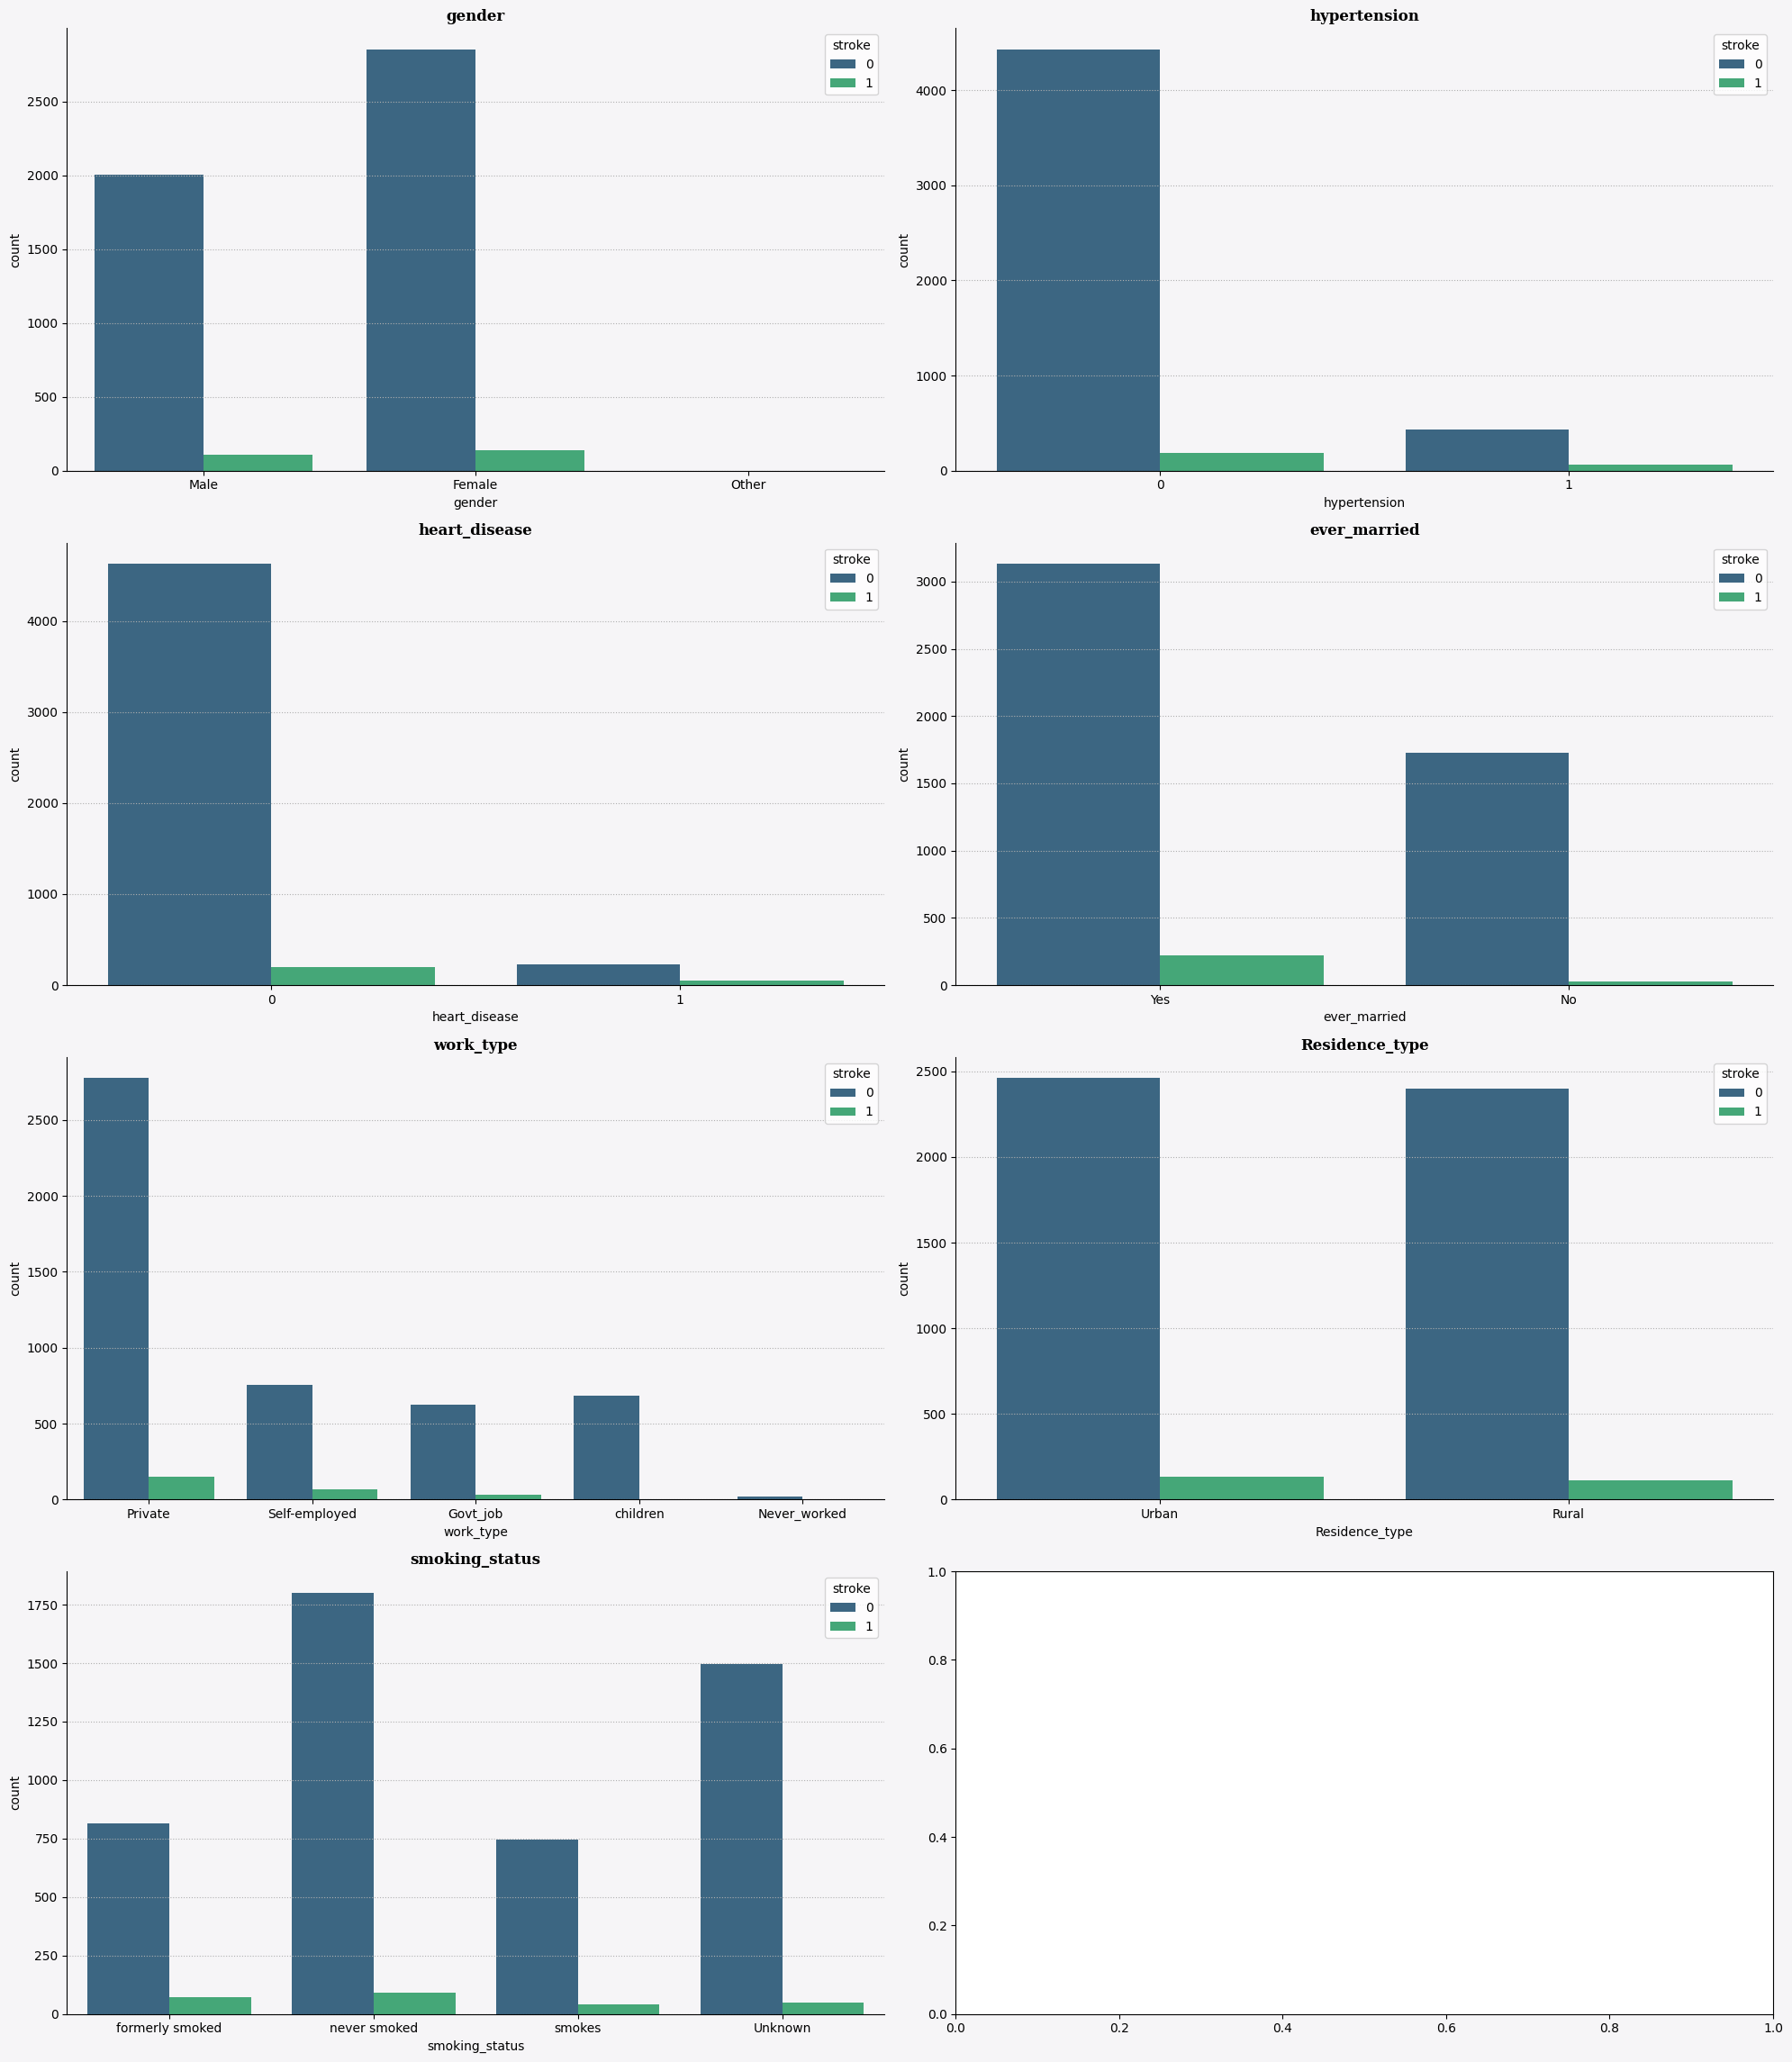

In [25]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']]

fig, axes = plt.subplots(4, 2, figsize=(20, 23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

for idx, val in enumerate(data_cat.columns):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':', axis='y')
    sns.countplot(data=data_cat, x=val, hue=data['stroke'], palette='viridis', ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

Hasil Pengamatan:

Observations :

1) Jumlah pria dan wanita yang mengalami stroke sama jumlahnya.

2) Jumlah orang yang tidak memiliki hipertensi juga menunjukkan tanda-tanda tidak ada stroke. Dan orang yang memiliki hipertensi juga tidak menunjukkan tanda-tanda lebih banyak orang yang terkena stroke.

3) Orang dengan penyakit jantung juga menunjukkan tanda-tanda stroke (seperti yang diharapkan).

4) Orang yang menikah menunjukkan tanda-tanda stroke lebih banyak daripada orang yang belum menikah (sesuai dugaan).

5) Karyawan swasta tampaknya lebih banyak mengalami stroke daripada jenis pekerjaan lainnya (mungkin karena tekanan kerja). Orang wiraswasta memang menunjukkan tanda-tanda stroke (mungkin karena alasan seperti penyakit jantung, tekanan tinggi, dll).

6) Tidak ada perbedaan antara orang yang tinggal di daerah perkotaan dan pedesaan dalam hal kejadian stroke.

7) Orang yang sebelumnya merokok dan yang merokok (gabungan) menunjukkan tanda-tanda stroke jauh lebih banyak daripada orang yang tidak pernah merokok (mengingat ukuran sampel orang yang tidak pernah merokok dan orang yang dulu merokok dan merokok sekarang).



#### **Numerical Features**

Melihat histogram masing-masing numerical yaitu `age` ,`avg_glucose_level`,  dan `bmi`


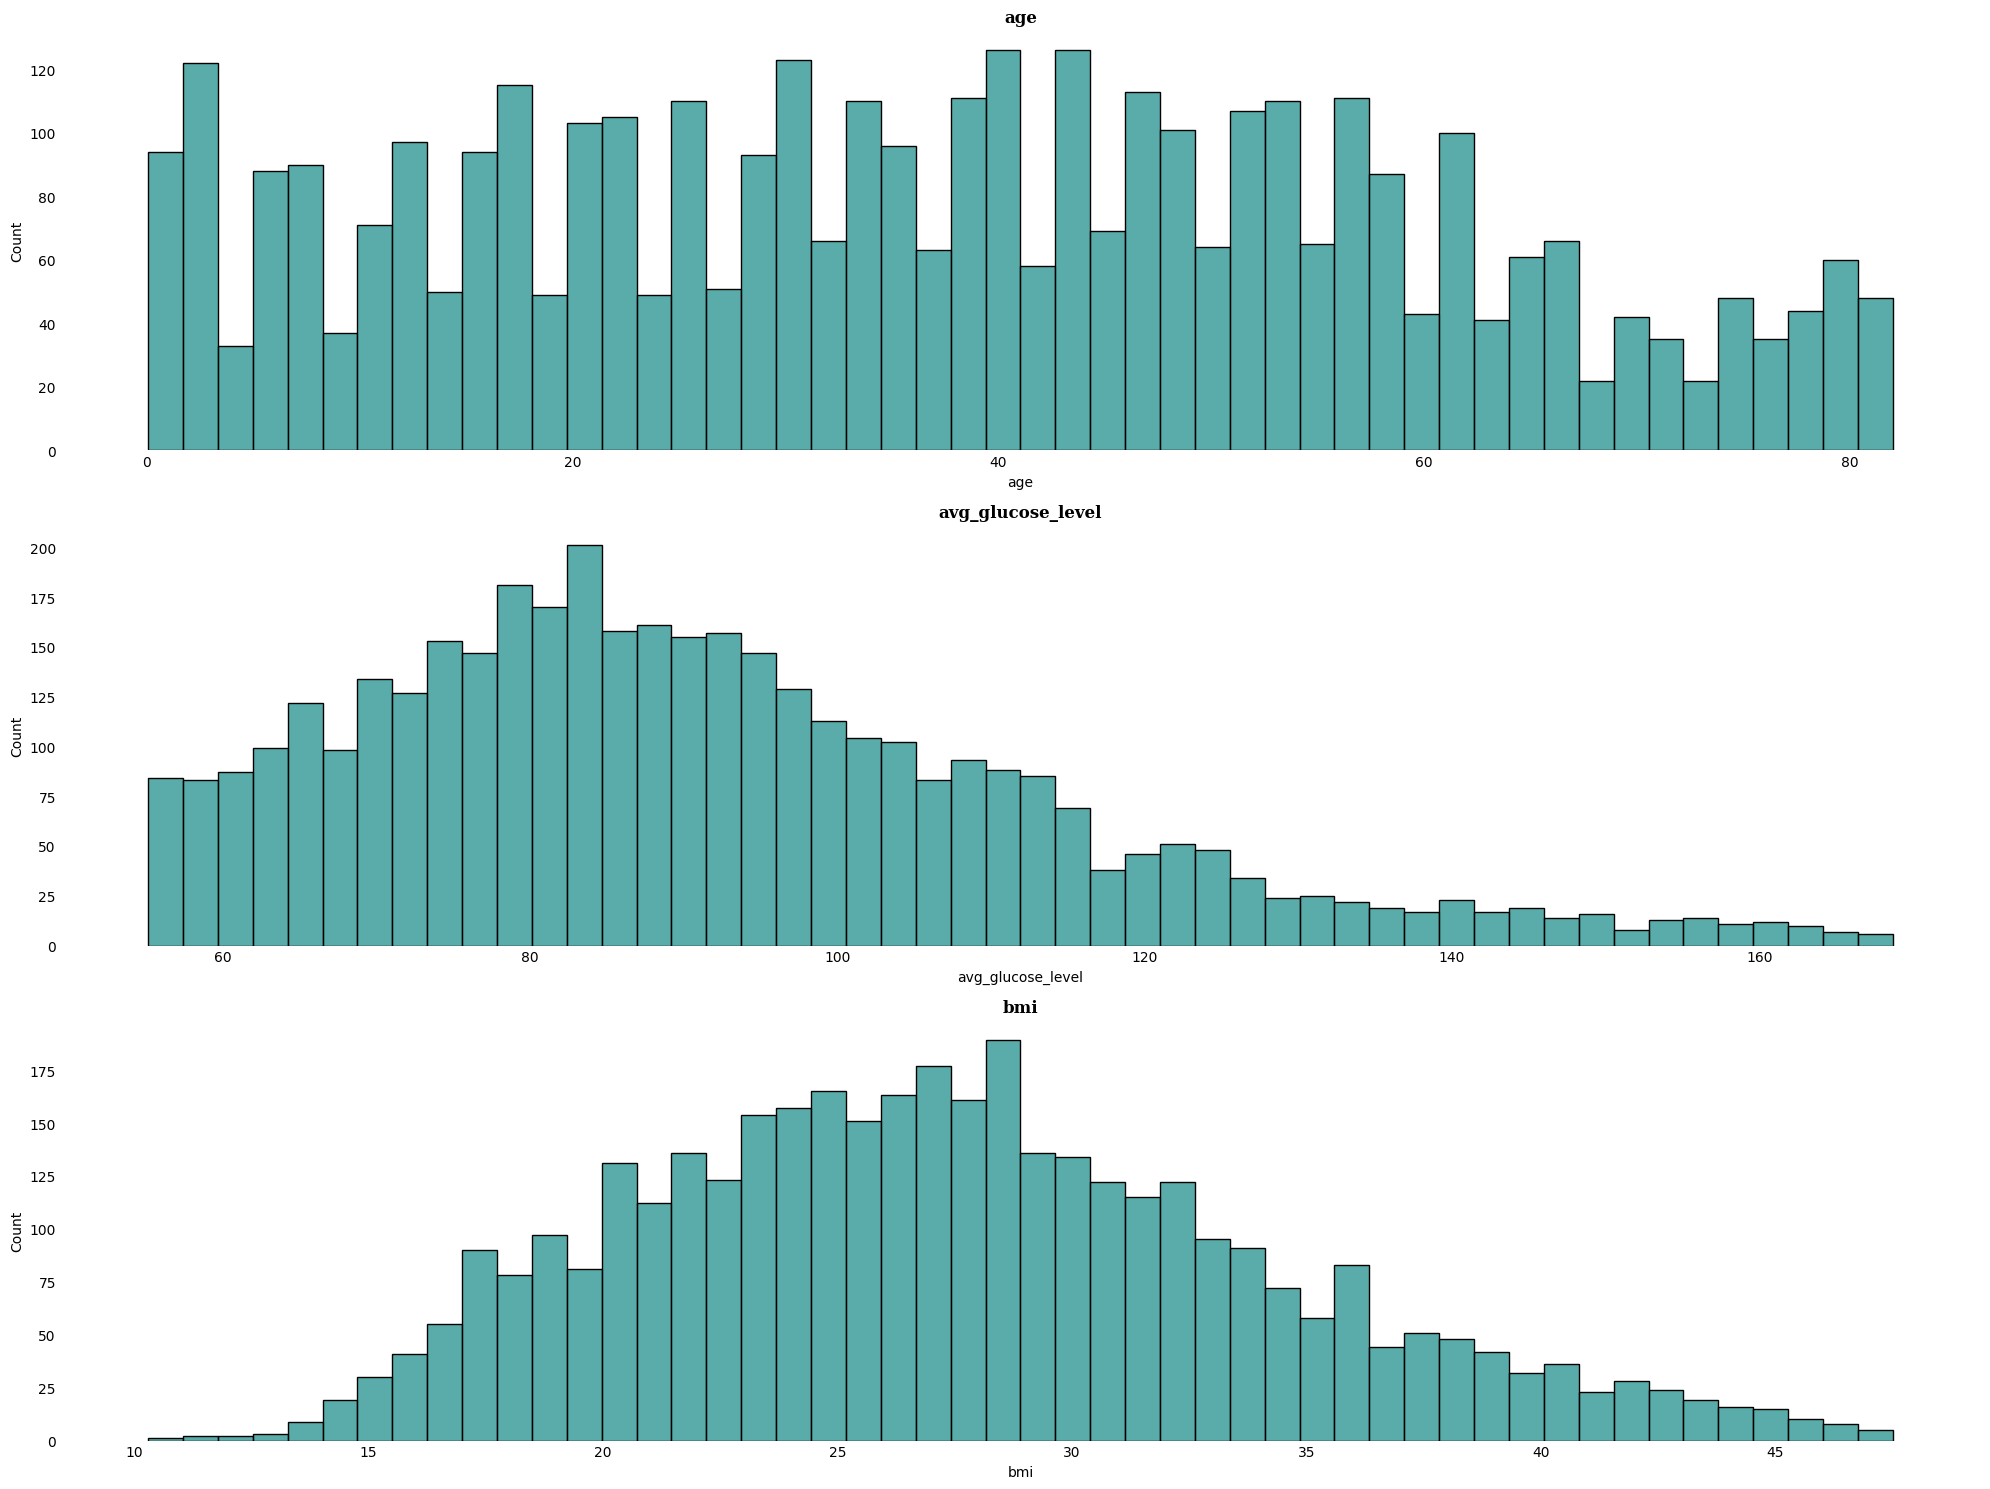

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

columns = ['age', 'avg_glucose_level', 'bmi']

for ax, col in zip(axes, columns):
    sns.histplot(stroke_prediction[col], bins=50, kde=False, color=sns.color_palette('viridis', 1)[0], ax=ax)
    ax.set_title(col, fontweight='bold', fontfamily='serif')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

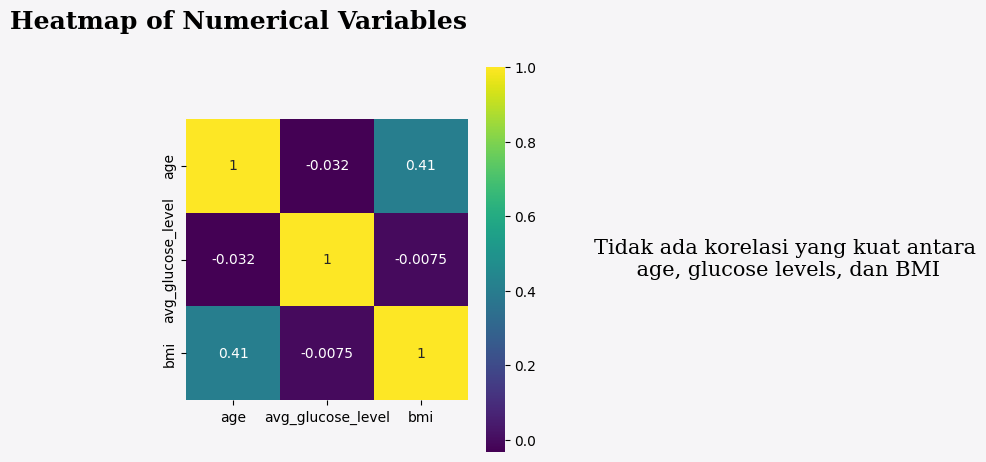

In [27]:
fig = plt.figure(figsize=(10, 5), dpi=100)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)

# Heatmap of numerical data
corrmat = stroke_prediction[data_numerical].corr()
sns.heatmap(ax=ax0, data=corrmat, annot=True, cmap="viridis", square=True)
ax1.text(0.5, 0.5, 'Tidak ada korelasi yang kuat antara\n age, glucose levels, dan BMI', horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for spine in ["top", "right", "bottom", "left"]:
    ax1.spines[spine].set_visible(False)

plt.text(-1.7, 1.1, 'Heatmap of Numerical Variables', fontsize=18, fontweight='bold', fontfamily='serif')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1500 with 0 Axes>

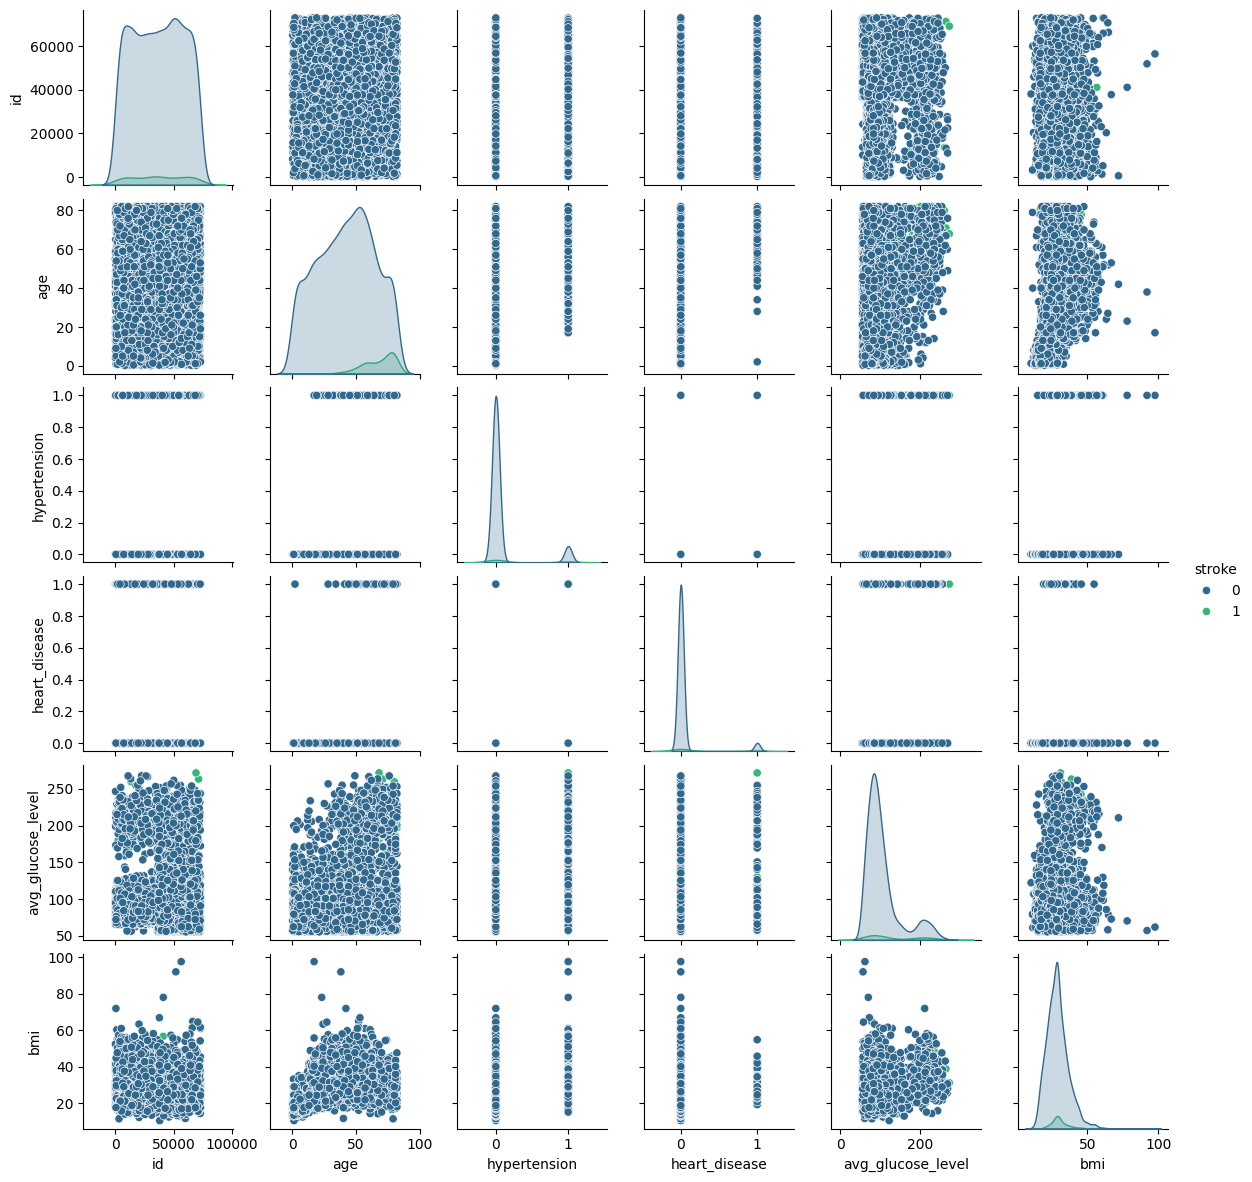

In [28]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='stroke',size=2,palette='viridis')
plt.show()

## **Data Preparation**

Ubah Marrital Status, Residence, dan Gender menjadi 0 dan 1. Kemudian menghapus tipe smoking unknown.

In [29]:
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0)
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

data=data[data['smoking_status']!='Unknown']

Melakukan One Hot Encoding di smoking_status dan work_type

In [30]:
data_dummies = data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)

In [31]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

**Splitting data menjadi training and testing sets.**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_stroke,test_size=0.2,random_state=123)

In [33]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

**Training the Models**

Proses modeling yang dilakukan menggunakan 3 algoritma dan mencari performa yang paling baik di antara ketiganya.

In [35]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

**K-Nearest Neighbor**

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Initialize the KNN model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(x_train, y_train)

# Predict on training and testing data
y_train_pred_knn = knn_model.predict(x_train)
y_test_pred_knn = knn_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

# Update the models dataframe
models['KNN'] = [train_mse_knn, test_mse_knn]

# Print the results
print("K-Nearest Neighbor Model:")
print("Training MSE:", train_mse_knn)
print("Testing MSE:", test_mse_knn)

K-Nearest Neighbor Model:
Training MSE: 0.04168845722824058
Testing MSE: 0.15260504201680675


**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=123)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on training and testing data
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

# Update the models dataframe
models['RandomForest'] = [train_mse_rf, test_mse_rf]

# Print the results
print("Random Forest Model:")
print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)

Random Forest Model:
Training MSE: 0.0071555098991408295
Testing MSE: 0.0819798319327731


**Boosting Algorithm**

In [38]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost model
adaboost_model = AdaBoostRegressor(random_state=123)

# Train the model
adaboost_model.fit(x_train, y_train)

# Predict on training and testing data
y_train_pred_adaboost = adaboost_model.predict(x_train)
y_test_pred_adaboost = adaboost_model.predict(x_test)

# Calculate Mean Squared Error (MSE)
train_mse_adaboost = mean_squared_error(y_train, y_train_pred_adaboost)
test_mse_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)

# Update the models dataframe
models['Boosting'] = [train_mse_adaboost, test_mse_adaboost]

# Print the results
print("AdaBoost Model:")
print("Training MSE:", train_mse_adaboost)
print("Testing MSE:", test_mse_adaboost)

AdaBoost Model:
Training MSE: 0.13870299690717233
Testing MSE: 0.16369903749899795


**Evaluasi Model**

Evaluasi metrik yang digunakan untuk mengukur kinerja model adalah metrik mse (Mean Squared Error). Pemilihan matrik ini disebabkan karena kasus atau domain proyek yang dipilih adalah klasifikasi. Matrik MSE, pada dasarnya akan mengukur kuadrat rerata error dari prediksi yang dilakukan. MSE juga akan menghitung selisih kuadrat antara prediksi dan target, yang kemudian melakukan perhitungan rata-rata terhadap nilai-nilai tersebut.

Semakin tinggi nilai yang diperoleh MSE, semakin buruk juga modelnya. Nilai MSE tidak pernah negatif, tetapi akan menjadi NOL untuk model yang sempurna.

In [39]:
# Display the models dataframe
print("Model Evaluation Results:")
print(models)

Model Evaluation Results:
                KNN  RandomForest  Boosting
train_mse  0.041688      0.007156  0.138703
test_mse   0.152605      0.081980  0.163699


<Figure size 1000x600 with 0 Axes>

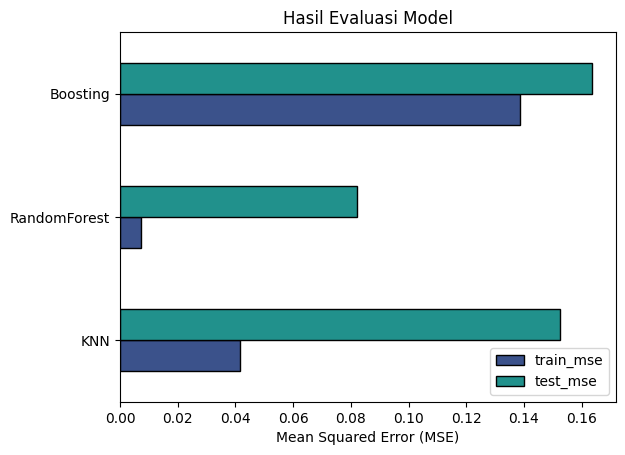

In [43]:
plt.figure(figsize=(10, 6))
models.T.plot(kind='barh', color=sns.color_palette('viridis', n_colors=len(models.columns)), edgecolor='black')
plt.title('Hasil Evaluasi Model')
plt.xlabel('Mean Squared Error (MSE)')
plt.legend(loc='best')
plt.show()

Dari _plot_ yang disajikan di atas, dapat diketahui bahwa model Random Forest memberikan nilai error yang paling kecil. Sehingga, model Random Forest lah yang dipilih sebagai model terbaik untuk melakukan klasifikasi penyakit jantung.

In [41]:
# Create a copy of the first row of the test data for prediction
prediksi = x_test[:1].copy()

# Initialize a dictionary to store the true and predicted values
pred_dict = {'y_true': y_test[:1]}

# Iterate through each model and make predictions
for name, model in {'KNN': knn_model, 'RandomForest': rf_model, 'Boosting': adaboost_model}.items():
    # Make predictions and round to one decimal place
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

# Create a DataFrame from the dictionary
pred_df = pd.DataFrame(pred_dict)

# Display the DataFrame
print(pred_df)

      y_true  prediksi_KNN  prediksi_RandomForest  prediksi_Boosting
3936       0           0.0                    0.1                0.1


Hasil prediksi yang diberikan oleh model Random Forest adalah benar, dikarenakan mendekati nilai y_true.